In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

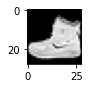

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(train_images[0] , cmap='gray')

In [9]:
ans= ['T-shirt/top ', 'Trouser', 'Pullover' ,'Dress',  'Coat' ,'Sandal' ,'Shirt' , 
      'Sneaker' ,'Bag' ,'Ankle boot']

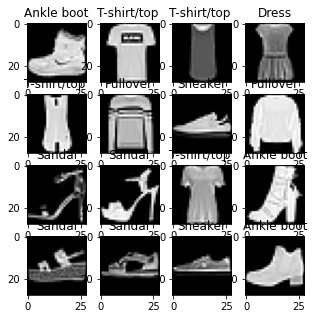

In [12]:
f,ax = plt.subplots(4,4,figsize=(5,5))
for i, v in enumerate(train_images[:16]):
    ax[i//4, i%4].imshow(v, cmap='gray')
    ax[i//4, i%4].set_title(ans[train_labels[i]])

In [23]:
model = Sequential()
model.add(Conv2D(filters = 32,
                                 kernel_size = (3,3), 
                                 input_shape =(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,
                 kernel_size = (3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [15]:
32*3*3+32

320

In [18]:
32*64*3*3+64

18496

In [24]:
train_images.shape

(60000, 28, 28)

In [27]:
train_images = train_images/255.
#normalize the data

In [29]:
cnn_x_train = train_images.reshape(60000, 28, 28, 1) 
# reshaping because our model is expecting input in the shape of 28*28*1

In [30]:
cnn_x_train.shape

(60000, 28, 28, 1)

In [31]:
train_labels.shape

(60000,)

In [32]:
train_labels[0:10] # just checking couple of rows

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [39]:
model.fit(cnn_x_train, train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 44s 47ms/step - loss: 0.2632
Epoch 2/10
938/938 [==============================] - 45s 48ms/step - loss: 0.2473
Epoch 3/10
938/938 [==============================] - 45s 48ms/step - loss: 0.2338
Epoch 4/10
938/938 [==============================] - 45s 48ms/step - loss: 0.2230
Epoch 5/10
938/938 [==============================] - 46s 49ms/step - loss: 0.2121
Epoch 6/10
938/938 [==============================] - 47s 50ms/step - loss: 0.2010
Epoch 7/10
938/938 [==============================] - 46s 49ms/step - loss: 0.1903
Epoch 8/10
938/938 [==============================] - 43s 46ms/step - loss: 0.1831
Epoch 9/10
938/938 [==============================] - 41s 44ms/step - loss: 0.1746
Epoch 10/10
938/938 [==============================] - 43s 46ms/step - loss: 0.1678


In [40]:
cnn_x_test = test_images.reshape(10000, 28, 28, 1) /255.0
yhat = model.predict(cnn_x_test)
yhat.shape

(10000, 10)

In [41]:
final_pred = yhat.argmax(axis=1)

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(test_labels, final_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.88      0.83      1000
           3       0.90      0.92      0.91      1000
           4       0.88      0.77      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.71      0.70      0.71      1000
           7       0.96      0.95      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.89     10000

